# DCS640
# Milestone 1
# Justin Pizzoferrato
# 22Mar2025

# Milestone 1

## Summary of Analysis

This analysis explores national trends in childcare affordability using the National Database of Childcare Prices (NDCP), a dataset compiled by the U.S. Department of Labor Women’s Bureau. The dataset spans over 34,000 records from 2008 to 2018 and includes more than 200 variables across all 50 U.S. states. The analysis was conducted using Python and Jupyter Notebook, focusing on exploratory data analysis (EDA) to uncover trends, disparities, and pricing structures across geographic, temporal, and care-setting dimensions.

Initial cleaning and review revealed a significant number of missing values in the MFCC columns, which represent specific childcare environments (e.g., toddler care, infant care, center-based facilities). These columns were filtered to focus on those with at least 50% completeness. A correlation heatmap showed strong consistency across pricing variables grouped by age or care type, validating the reliability of the reported rates.

One key finding was the national rise and fall of the median unsubsidized childcare rate for children under 16 (`MUNR_16`). Between 2008 and 2014, the average rate rose steadily, peaking at approximately $9.50 per hour. However, from 2015 to 2018, a steady decline was observed across most regions. When grouped by Census region, the Northeast and West had the highest childcare rates throughout the decade, while the Midwest consistently exhibited the lowest.

Comparative analysis of `MUNR_16` against `MUNR_20to64`—a broader proxy for adult care or general service costs—revealed that childcare rates are notably more volatile and clustered around a higher median. Boxplots further supported the presence of significant outliers in both care age groups.

A final area of exploration focused on pricing differences across childcare settings, as represented by the MFCC variables. Among these, infant care (`MFCCInfant`) had the highest average cost at 113.42 dollars per unit. In contrast, preschool care (`MFCCPreschool`) was slightly more affordable, averaging 104.19 dollaras per unit. These pricing differences demonstrate how the type of care significantly influences overall affordability. A boxplot visualization further revealed that many care settings—particularly center-based or infant-focused—often exceeded 200 dollars per unit, indicating the presence of substantial cost outliers within the dataset.

---

## Assumptions and Clarifications

Some variables were renamed or grouped to simplify visual clarity during analysis. State-level data was also mapped to U.S. Census regions using a manually defined dictionary. Missing values were not imputed to avoid misrepresenting cost estimates, particularly within MFCC columns where over 40% of values were missing. Setting-specific identifiers (e.g., `MFCC2011`, `MFCC2035`) were treated as proxies for care environments, though the exact nature of each MFCC column is not explicitly defined in the technical guide. These assumptions were necessary for analysis but should be validated in future work.

---

## Direction of Story and Intended Message

This project aims to highlight the unequal burden of childcare expenses across U.S. regions and provider types. It asks the viewer to consider how geography and care setting influence a family’s financial access to early education, and what role public policy might play in leveling this field. Through visuals and data storytelling, the goal is to raise awareness about affordability disparities and advocate for informed interventions.

---

## Target Audience

The target audience includes state policymakers, education funding boards, and nonprofit childcare advocates. Secondary audiences include researchers and parents who are exploring childcare options in their communities. Visualizations will be tailored based on data literacy—interactive dashboards for professional audiences and simplified infographics for public-facing platforms.

---

## Mediums for Communication

To effectively communicate the findings of this analysis and encourage data-informed policy action, three distinct mediums will be used:

1. **Interactive Dashboard (Tableau):**  
   This tool will allow users to filter and explore trends in childcare pricing by year, state, region, and setting type. It provides an intuitive interface for policymakers and analysts to visualize geographic disparities and temporal patterns in real time. Key metrics such as average rate, rate volatility, and regional comparisons will be included. The dashboard will serve as the primary exploratory tool for data-literate stakeholders.

2. **Infographic (Canva):**  
   A visually compelling one-page infographic will highlight the most critical insights, including the peak in costs around 2014, the high cost of infant care, and regional differences. The infographic is designed for rapid comprehension by the general public and can be used in advocacy campaigns, parent newsletters, or social media. It will include bold visuals, concise captions, and a clear message around affordability.

3. **Presentation (PowerPoint):**  
   This medium will be used to present the full story arc—from data exploration to findings to policy implications. Each slide will focus on one key insight with supporting visuals and narrative. The presentation will include speaker notes and conclude with a specific call to action, such as expanding subsidies, improving data transparency, or piloting regional childcare cost controls.

These mediums are intentionally diverse in format and audience focus to maximize the reach and impact of the story across policy, professional, and public domains.

# EDA for Milestone 1

In [134]:
# Suppress warnings
import warnings
warnings.simplefilter(action='ignore', category=Warning)

# Correct import for display (to fix deprecation warning)
from IPython.display import display, HTML

# Expand display width for better PDF formatting
display(HTML("<style>.container { width:98% !important; }</style>"))

# Ensure long code lines wrap instead of being cut off
display(HTML("""
<style>
    pre {
        white-space: pre-wrap !important;  /* Wrap code blocks */
        word-wrap: break-word !important;
        overflow-wrap: break-word !important;
    }
</style>
"""))

# Set Pandas options to prevent text truncation in tables
pd.set_option('display.max_colwidth', None)  # Prevents text cutoff in tables
pd.set_option('display.max_columns', None)   # Shows all columns
pd.set_option('display.max_rows', 100)       # Displays up to 100 rows for better PDF formatting

# Adjust Matplotlib settings for consistent plotting
import matplotlib.pyplot as plt
plt.style.use('ggplot')  # Clean, readable plots
plt.rcParams['figure.figsize'] = (12, 6)  # Larger figure size to avoid cropping
plt.rcParams['axes.labelsize'] = 14  # Improve axis label readability
plt.rcParams['axes.titlesize'] = 16  # Larger titles for better clarity
plt.rcParams['xtick.labelsize'] = 12  # Adjust x-axis label size
plt.rcParams['ytick.labelsize'] = 12  # Adjust y-axis label size

# Prevent Jupyter from cutting off table outputs by forcing full table rendering
display(HTML("""
<style>
    .dataframe tbody tr th:only-of-type { visibility: hidden; }
    .dataframe tbody tr th { display: none; }
    .dataframe tbody tr td { white-space: nowrap; }
    .dataframe thead tr th { text-align: left; }
</style>
"""))

# Ensure all cell outputs are fully displayed in the notebook before exporting
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Ensure plots are not clipped when exporting
plt.tight_layout()

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set visualization style
sns.set(style='whitegrid')

# Load the Excel file
file_path = '/Users/justinpizzoferrato/Downloads/nationaldatabaseofchildcareprices.xlsx'
df = pd.read_excel(file_path)

# Show basic info
print("Shape of dataset:", df.shape)
df.head()

Shape of dataset: (34567, 227)


,State_Name,State_Abbreviation,County_Name,County_FIPS_Code,StudyYear,UNR_16,FUNR_16,MUNR_16,UNR_20to64,FUNR_20to64,MUNR_20to64,FLFPR_20to64,FLFPR_20to64_Under6,FLFPR_20to64_6to17,FLFPR_20to64_Under6_6to17,MLFPR_20to64,PR_F,PR_P,MHI,ME,FME,MME,MHI_2018,ME_2018,FME_2018,MME_2018,TotalPop,OneRace,OneRace_W,OneRace_B,OneRace_I,OneRace_A,OneRace_H,OneRace_Other,TwoRaces,Hispanic,Households,H_Under6_BothWork,H_Under6_FWork,H_Under6_MWork,H_Under6_SingleM,H_6to17_BothWork,H_6to17_Fwork,H_6to17_Mwork,H_6to17_SingleM,EMP_M,MEMP_M,FEMP_M,EMP_Service,MEMP_Service,FEMP_Service,EMP_Sales,MEMP_Sales,FEMP_Sales,EMP_N,MEMP_N,FEMP_N,EMP_P,MEMP_P,FEMP_P,iUNR_16,iFUNR_16,iMUNR_16,iUNR_20to64,iFUNR_20to64,iMUNR_20to64,iFLFPR_20to64,iFLFPR_20to64_Under6,iFLFPR_20to64_6to17,iFLFPR_20to64_Under6_6to17,iMLFPR_20to64,iPR_F,iPR_P,iMHI,iME,iFME,iMME,iMHI_2018,iME_2018,iFME_2018,iMME_2018,iTotalPop,iOneRace,iOneRace_W,iOneRace_B,iOneRace_I,iOneRace_A,iOneRace_H,iOneRace_Other,iTwoRaces,iHispanic,iHouseholds,iH_Under6_BothWork,iH_Under6_FWork,iH_Under6_MWork,iH_Under6_SingleM,iH_6to17_BothWork,iH_6to17_Fwork,iH_6to17_Mwork,iH_6to17_SingleM,iEMP_M,iMEMP_M,iFEMP_M,iEMP_Service,iMEMP_Service,iFEMP_Service,iEMP_Sales,iMEMP_Sales,iFEMP_Sales,iEMP_N,iMEMP_N,iFEMP_N,iEMP_P,iMEMP_P,iFEMP_P,MCBto5,MC6to11,MC12to17,MC18to23,MC24to29,MC30to35,MC36to41,MC42to47,MC48to53,MC54toSA,MCSA,MFCCBto5,MFCC6to11,MFCC12to17,MFCC18to23,MFCC24to29,MFCC30to35,MFCC36to41,MFCC42to47,MFCC48to53,MFCC54toSA,MFCCSA,_75CBto5,_75C6to11,_75C12to17,_75C18to23,_75C24to29,_75C30to35,_75C36to41,_75C42to47,_75C48to53,_75C54toSA,_75CSA,_75FCCBto5,_75FCC6to11,_75FCC12to17,_75FCC18to23,_75FCC24to29,_75FCC30to35,_75FCC36to41,_75FCC42to47,_75FCC48to53,_75FCC54toSA,_75FCCSA,iMCBto5,iMC6to11,iMC12to17,iMC18to23,iMC24to29,iMC30to35,iMC36to41,iMC42to47,iMC48to53,iMC54toSA,iMCSA,iMFCCBto5,iMFCC6to11,iMFCC12to17,iMFCC18to23,iMFCC24to29,iMFCC30to35,iMFCC36to41,iMFCC42to47,iMFCC48to53,iMFCC54toSA,iMFCCSA,i_75CBto5,i_75C6to11,i_75C12to17,i_75C18to23,i_75C24to29,i_75C30to35,i_75C36to41,i_75C42to47,i_75C48to53,i_75C54toSA,i_75CSA,i_75FCCBto5,i_75FCC6to11,i_75FCC12to17,i_75FCC18to23,i_75FCC24to29,i_75FCC30to35,i_75FCC36to41,i_75FCC42to47,i_75FCC48to53,i_75FCC54toSA,i_75FCCSA,MCInfant,MCInfant_flag,MCToddler,MCToddler_flag,MCPreschool,MCPreschool_flag,_75CInfant,_75CInfant_flag,_75CToddler,_75CToddler_flag,_75CPreschool,_75CPreschool_flag,MFCCInfant,MFCCInfant_flag,MFCCToddler,MFCCToddler_flag,MFCCPreschool,MFCCPreschool_flag,_75FCCInfant,_75FCCInfant_flag,_75FCCToddler,_75FCCToddler_flag,_75FCCPreschool,_75FCCPreschool_flag
0,Alabama,AL,Autauga County,1001,2008,5.42,4.41,6.32,4.6,3.5,5.6,68.9,66.9,79.59,60.81,84.0,8.5,11.5,50837.0,28444.0,21875.0,36032.0,58462.55,32710.60,25156.25,41436.80,49744,98.1,78.9,17.7,0.4,0.4,0.0,0.7,1.9,1.8,18373,1543,970,22,995.0,4900,1308,114,1966.0,27.40,24.41,30.68,17.06,15.53,18.75,29.11,15.97,43.52,13.21,22.54,2.99,13.22,21.55,4.07,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,104.95,104.95,104.95,104.95,104.95,85.92,85.92,85.92,85.92,85.92,80.92,83.45,83.45,83.45,83.45,83.45,81.40,81.40,81.40,81.40,81.40,81.40,125.8,125.8,125.8,125.8,125.8,103.0,103.0,103.0,103.0,103.0,97.0,97.4,97.4,97.4,97.4,97.4,95.0,95.0,95.0,95.0,95.0,95.0,11.0,11.0,11.0,11.0,11.0,11.0,11.0,11.0,11.0,11.0,11.0,11.0,11.0,11.0,11.0,11.0,11.0,11.0,11.0,11.0,11.0,11.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,104.95,1.0,104.95,3.0,85.92,1.0,125.8,1.0,125.8,3.0,103.0,1.0,83.45,1.0,83.45,3.0,81.40,1.0,97.4,1.0,97.4,3.0,95.0,1.0
1,Alabama,AL,Autauga County,1001,2009,5.93,5.72,6.11,4.8,4.6,5.0,70.8,63.7,78.41,59.91,86.2,7.5,10.3,51463.0,29648.0,22951.0,37492.0,60211.71,34688.16,26852.67,43865.64,49584,98.6,79.1,17.9,0.4,0.6,0.0,0.7,1.4,2.0,18288,1475,964,16,1099.0,5028,1519,92,2305.0,29.54,26.07,33.40,15.81,14.16,17.64,28.75,17.51,41.25,11.89,20.30,2.52,14.02,21.96,5.19,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1

<Figure size 1440x720 with 0 Axes>

In [135]:
# View column names
print("Columns:\n", df.columns)

# Data types and null values
df.info()

# Missing values
print("\nMissing values per column:")
print(df.isnull().sum())

Columns:
 Index(['State_Name', 'State_Abbreviation', 'County_Name', 'County_FIPS_Code',
       'StudyYear', 'UNR_16', 'FUNR_16', 'MUNR_16', 'UNR_20to64',
       'FUNR_20to64',
       ...
       'MFCCToddler', 'MFCCToddler_flag', 'MFCCPreschool',
       'MFCCPreschool_flag', '_75FCCInfant', '_75FCCInfant_flag',
       '_75FCCToddler', '_75FCCToddler_flag', '_75FCCPreschool',
       '_75FCCPreschool_flag'],
      dtype='object', length=227)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34567 entries, 0 to 34566
Columns: 227 entries, State_Name to _75FCCPreschool_flag
dtypes: float64(159), int64(65), object(3)
memory usage: 59.9+ MB

Missing values per column:
State_Name                  0
State_Abbreviation          0
County_Name                 0
County_FIPS_Code            0
StudyYear                   0
                        ...  
_75FCCInfant_flag       11184
_75FCCToddler           11184
_75FCCToddler_flag      11184
_75FCCPreschool         11184
_75FCCPreschool_flag    11184


In [136]:
df.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
State_Name,34567,51,Texas,2794,NaN,NaN,NaN,NaN,NaN,NaN,NaN
State_Abbreviation,34567,51,TX,2794,NaN,NaN,NaN,NaN,NaN,NaN,NaN
County_Name,34567,1879,Washington County,330,NaN,NaN,NaN,NaN,NaN,NaN,NaN
County_FIPS_Code,34567.0,NaN,NaN,NaN,30388.132786,15161.015383,1001.0,18177.0,29177.0,45081.0,56045.0
StudyYear,34567.0,NaN,NaN,NaN,2012.999711,3.162232,2008.0,2010.0,2013.0,2016.0,2018.0
...,...,...,...,...,...,...,...,...,...,...,...
_75FCCInfant_flag,23383.0,NaN,NaN,NaN,1.792841,0.81808,1.0,1.0,2.0,3.0,3.0
_75FCCToddler,23383.0,NaN,NaN,NaN,120.784283,35.334666,50.0,95.85,115.0,136.27,439.22
_75FCCToddler_flag,23383.0,NaN,NaN,NaN,1.188,0.58367,1.0,1.0,1.0,1.0,3.0
_75FCCPreschool,23383.0,NaN,NaN,NaN,117.897482,34.111188,46.45,95.0,112.5,132.76,386.72


In [137]:
# Filter out only the price-related columns to simplify exploration
price_cols = [col for col in df.columns if 'Price' in col or 'MFCC' in col or 'UNR' in col or 'FUNR' in col or 'MUNR' in col]

# Show a sample of those columns
print("Relevant price-related columns:\n")
print(price_cols[:15])  # just showing first 15 for brevity

Relevant price-related columns:

['UNR_16', 'FUNR_16', 'MUNR_16', 'UNR_20to64', 'FUNR_20to64', 'MUNR_20to64', 'iUNR_16', 'iFUNR_16', 'iMUNR_16', 'iUNR_20to64', 'iFUNR_20to64', 'iMUNR_20to64', 'MFCCBto5', 'MFCC6to11', 'MFCC12to17']


<Figure size 1440x720 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Missing Values per Price Column')

Text(0, 0.5, 'Count of Missing Values')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39]),
 [Text(0, 0, 'iMFCC48to53'),
  Text(1, 0, 'iMFCC36to41'),
  Text(2, 0, 'iMFCCBto5'),
  Text(3, 0, 'iMFCC6to11'),
  Text(4, 0, 'iMFCC12to17'),
  Text(5, 0, 'iMFCC18to23'),
  Text(6, 0, 'iMFCC24to29'),
  Text(7, 0, 'iMFCCSA'),
  Text(8, 0, 'iMFCC54toSA'),
  Text(9, 0, 'iMFCC30to35'),
  Text(10, 0, 'iMFCC42to47'),
  Text(11, 0, 'MFCC48to53'),
  Text(12, 0, 'MFCC54toSA'),
  Text(13, 0, 'MFCCInfant'),
  Text(14, 0, 'MFCCInfant_flag'),
  Text(15, 0, 'MFCCToddler'),
  Text(16, 0, 'MFCCToddler_flag'),
  Text(17, 0, 'MFCCPreschool'),
  Text(18, 0, 'MFCCSA'),
  Text(19, 0, 'MFCCPreschool_flag'),
  Text(20, 0, 'MFCC36to41'),
  Text(21, 0, 'MFCC30to35'),
  Text(22, 0, 'MFCC24to29'),
  Text(23, 0, 'MFCC18to23'),
  Text(24, 0, 'MFCC12to17'),
  Text(25, 0, 'MFCC6to11'),
  Text(26, 0, 'MFCCBto5'),
  Text(27, 0, 'MFCC42

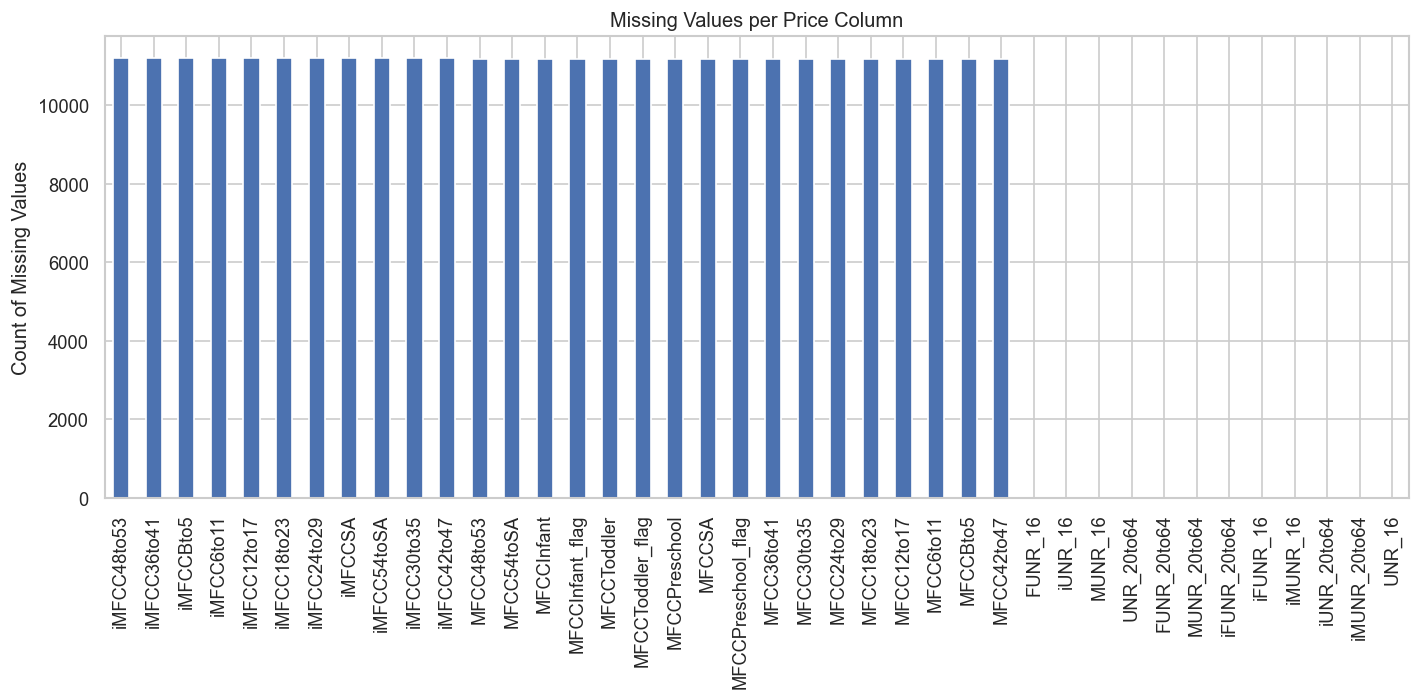

In [138]:
# Check for missing values across price-related columns
missing_prices = df[price_cols].isnull().sum().sort_values(ascending=False)

# Plot missing values
plt.figure(figsize=(12,6))
missing_prices.plot(kind='bar')
plt.title("Missing Values per Price Column")
plt.ylabel("Count of Missing Values")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

<Figure size 1680x1200 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Correlation Heatmap of Childcare Price Columns')

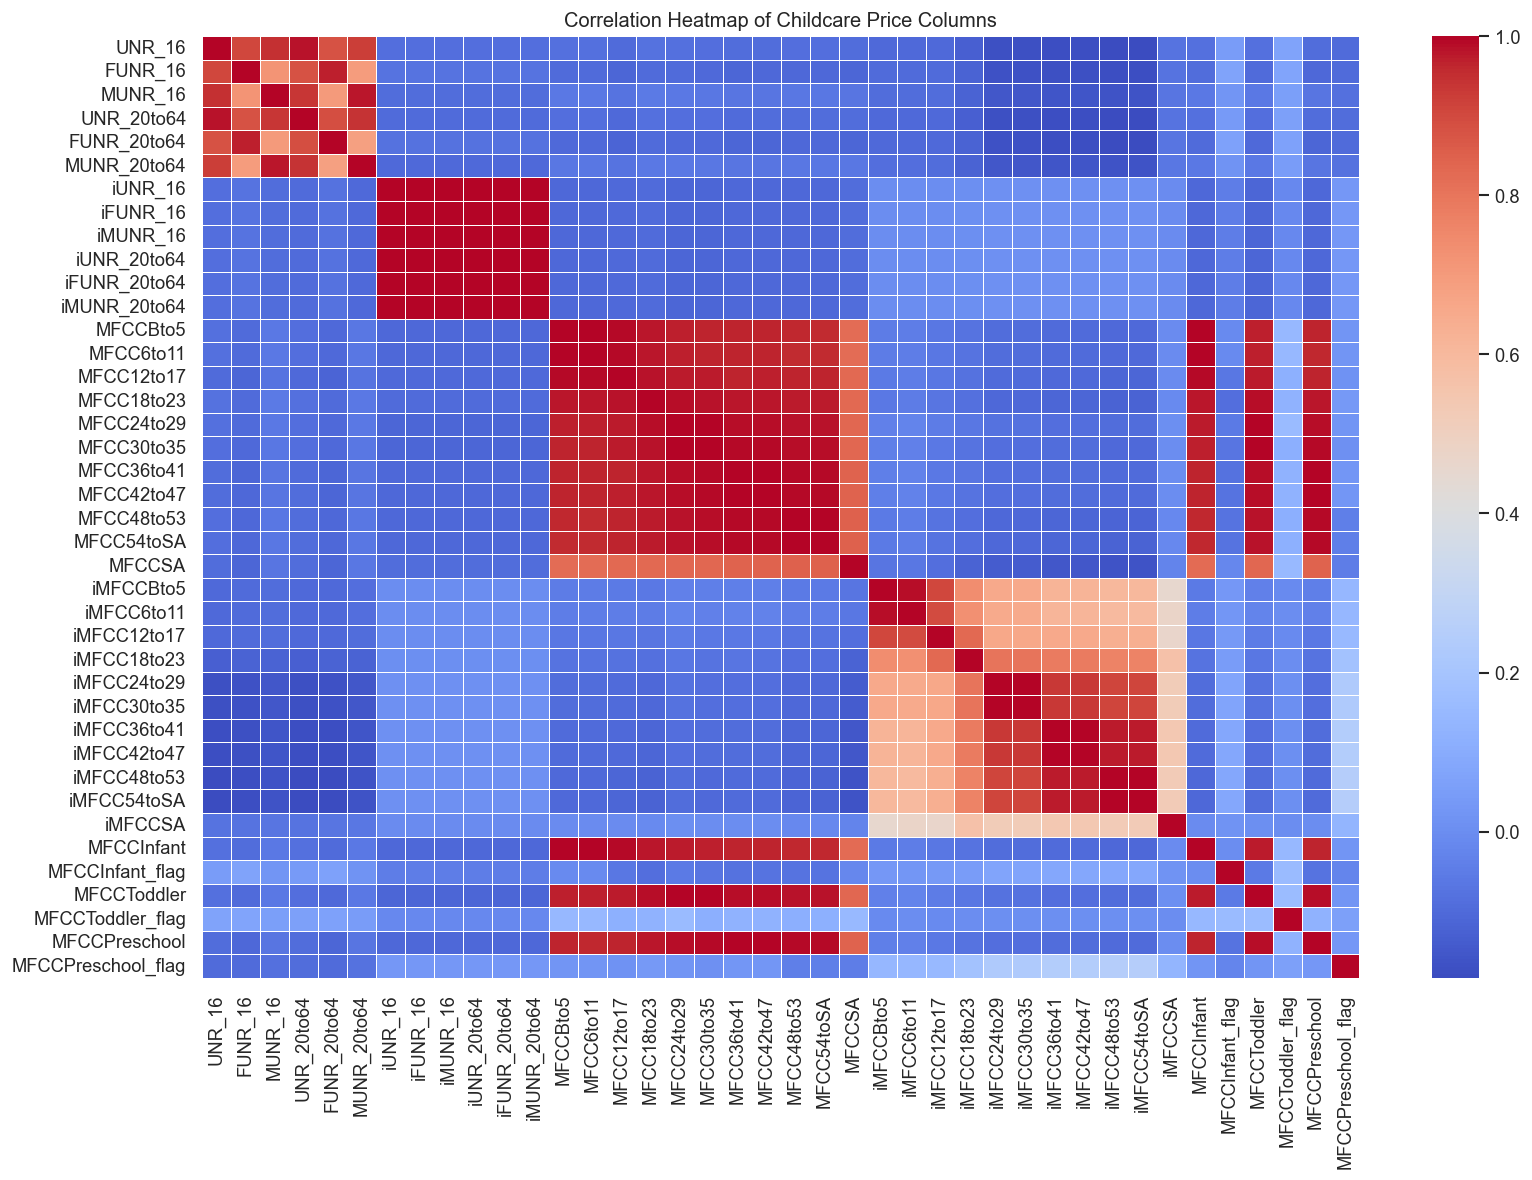

In [139]:
# Get numeric price-related columns only
numeric_price_cols = df[price_cols].select_dtypes(include='number')

# Compute and visualize correlation
plt.figure(figsize=(14, 10))
sns.heatmap(numeric_price_cols.corr(), annot=False, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap of Childcare Price Columns")
plt.tight_layout()
plt.show()

<Figure size 1200x720 with 0 Axes>

<Axes: xlabel='StudyYear', ylabel='MUNR_16'>

Text(0.5, 1.0, 'Average Median Unsubsidized Rate for Age < 16 by Year')

Text(0.5, 0, 'Year')

Text(0, 0.5, 'MUNR_16 (Avg Across U.S.)')

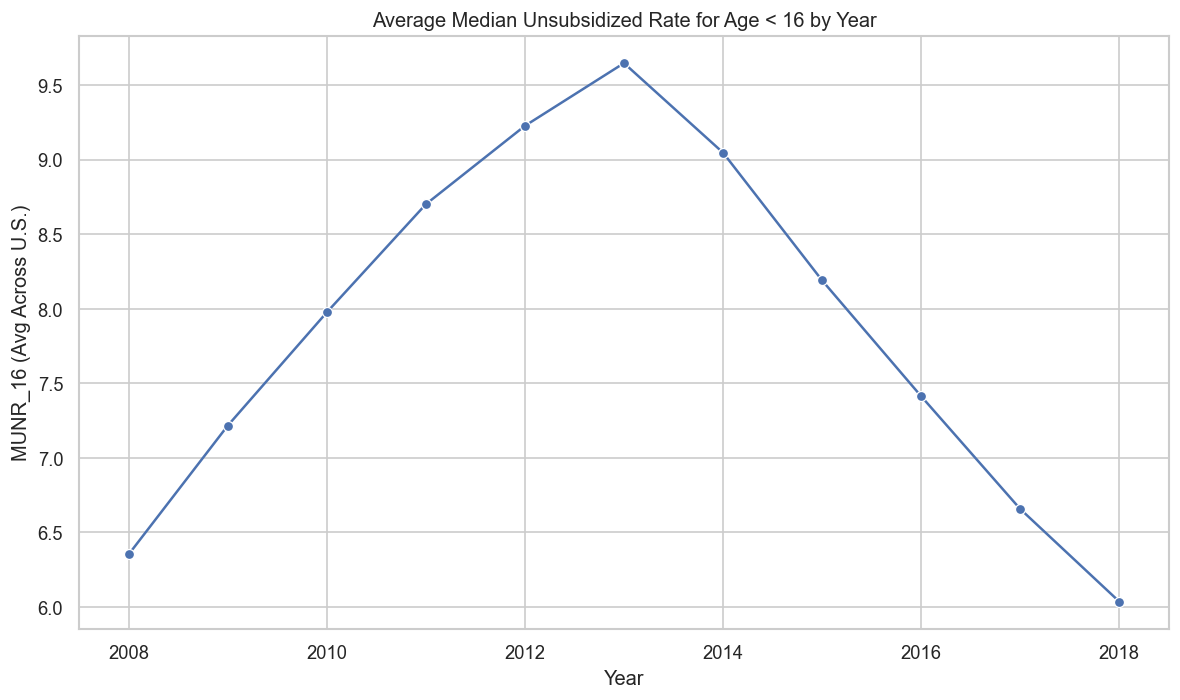

In [140]:
# Group by year and calculate mean price
munr_yearly = df.groupby('StudyYear')['MUNR_16'].mean().reset_index()

# Plot price over time
plt.figure(figsize=(10, 6))
sns.lineplot(data=munr_yearly, x='StudyYear', y='MUNR_16', marker='o')
plt.title("Average Median Unsubsidized Rate for Age < 16 by Year")
plt.xlabel("Year")
plt.ylabel("MUNR_16 (Avg Across U.S.)")
plt.grid(True)
plt.tight_layout()
plt.show()

<Figure size 1440x720 with 0 Axes>

<Axes: xlabel='State_Name'>

Text(0.5, 1.0, 'Top 15 States by Median Unsubsidized Rate (Age <16) in 2018')

Text(0, 0.5, 'MUNR_16')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, 'Alaska'),
  Text(1, 0, 'Mississippi'),
  Text(2, 0, 'Arizona'),
  Text(3, 0, 'West Virginia'),
  Text(4, 0, 'New Mexico'),
  Text(5, 0, 'Louisiana'),
  Text(6, 0, 'Alabama'),
  Text(7, 0, 'South Carolina'),
  Text(8, 0, 'California'),
  Text(9, 0, 'Michigan'),
  Text(10, 0, 'Kentucky'),
  Text(11, 0, 'Florida'),
  Text(12, 0, 'Oregon'),
  Text(13, 0, 'District of Columbia'),
  Text(14, 0, 'North Carolina')])

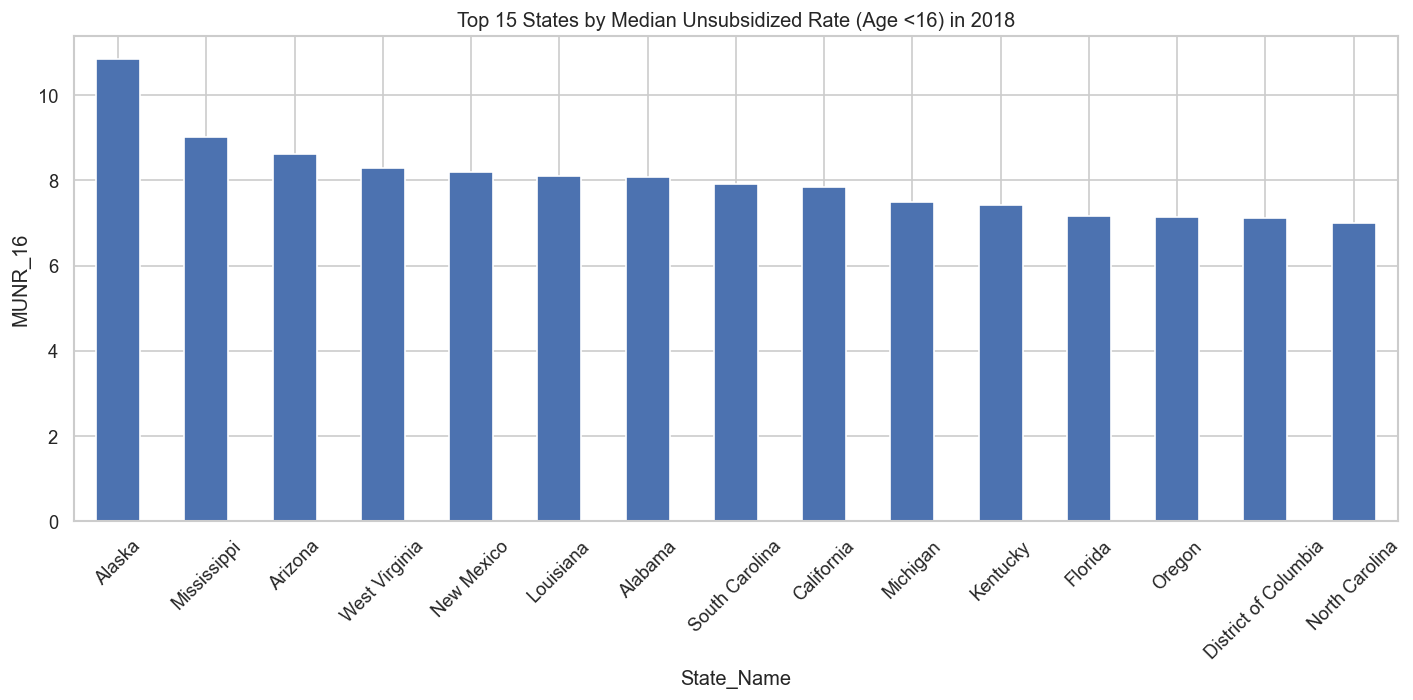

In [141]:
# Find the latest year
latest_year = df['StudyYear'].max()

# Filter data for that year
latest_df = df[df['StudyYear'] == latest_year]

# Group by state and get mean price
state_prices = latest_df.groupby('State_Name')['MUNR_16'].mean().sort_values(ascending=False)

# Plot top 15 most expensive states
plt.figure(figsize=(12,6))
state_prices.head(15).plot(kind='bar')
plt.title(f"Top 15 States by Median Unsubsidized Rate (Age <16) in {latest_year}")
plt.ylabel("MUNR_16")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<Figure size 1440x720 with 0 Axes>

<Axes: xlabel='StudyYear', ylabel='MUNR_16'>

Text(0.5, 1.0, 'MUNR_16 Trends by Region Over Time')

Text(0.5, 0, 'Year')

Text(0, 0.5, 'Median Unsubsidized Rate (Age <16)')

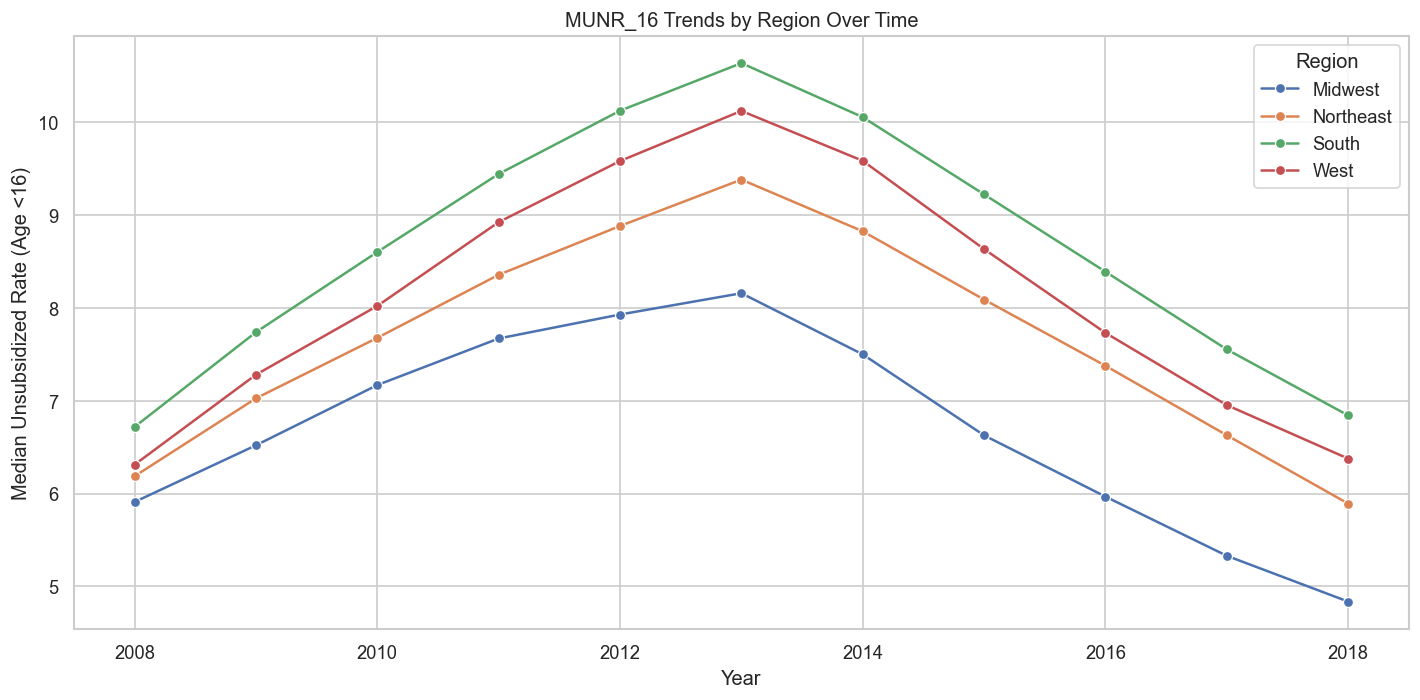

In [142]:
# Create a simplified state-to-region map (can be expanded later)
state_region_map = {
    'Maine': 'Northeast', 'New Hampshire': 'Northeast', 'Vermont': 'Northeast',
    'Massachusetts': 'Northeast', 'Rhode Island': 'Northeast', 'Connecticut': 'Northeast',
    'New York': 'Northeast', 'New Jersey': 'Northeast', 'Pennsylvania': 'Northeast',
    
    'Ohio': 'Midwest', 'Michigan': 'Midwest', 'Indiana': 'Midwest', 'Illinois': 'Midwest',
    'Wisconsin': 'Midwest', 'Minnesota': 'Midwest', 'Iowa': 'Midwest', 'Missouri': 'Midwest',
    'North Dakota': 'Midwest', 'South Dakota': 'Midwest', 'Nebraska': 'Midwest', 'Kansas': 'Midwest',
    
    'Delaware': 'South', 'Maryland': 'South', 'District of Columbia': 'South', 'Virginia': 'South',
    'West Virginia': 'South', 'North Carolina': 'South', 'South Carolina': 'South', 'Georgia': 'South',
    'Florida': 'South', 'Kentucky': 'South', 'Tennessee': 'South', 'Mississippi': 'South',
    'Alabama': 'South', 'Arkansas': 'South', 'Louisiana': 'South', 'Texas': 'South', 'Oklahoma': 'South',
    
    'Montana': 'West', 'Idaho': 'West', 'Wyoming': 'West', 'Colorado': 'West', 'New Mexico': 'West',
    'Arizona': 'West', 'Utah': 'West', 'Nevada': 'West', 'California': 'West', 'Oregon': 'West',
    'Washington': 'West', 'Alaska': 'West', 'Hawaii': 'West'
}

# Map states to regions
df['Region'] = df['State_Name'].map(state_region_map)

# Group by year and region, compute average MUNR_16
region_yearly = df.groupby(['StudyYear', 'Region'])['MUNR_16'].mean().reset_index()

# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=region_yearly, x='StudyYear', y='MUNR_16', hue='Region', marker='o')
plt.title("MUNR_16 Trends by Region Over Time")
plt.xlabel("Year")
plt.ylabel("Median Unsubsidized Rate (Age <16)")
plt.grid(True)
plt.tight_layout()
plt.show()

<Figure size 1440x720 with 0 Axes>

<Axes: xlabel='Age_Group', ylabel='Price'>

Text(0.5, 1.0, 'Childcare vs Broader Spending (Median Unsubsidized Rate)')

Text(0, 0.5, 'Price')

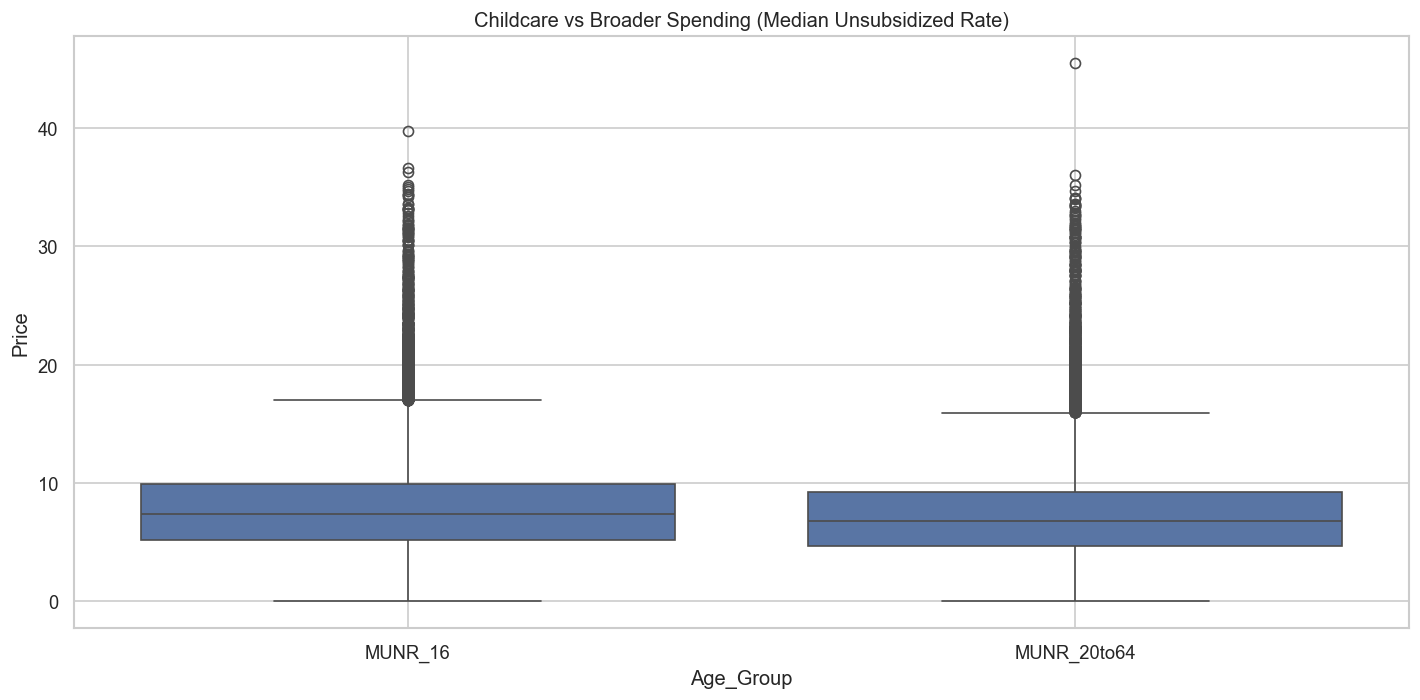

In [143]:
# Melt the dataframe to long format for side-by-side comparison
age_price_cols = ['MUNR_16', 'MUNR_20to64']
age_df = df[['StudyYear', 'State_Name'] + age_price_cols].dropna()

melted = pd.melt(age_df, id_vars=['StudyYear', 'State_Name'], 
                 value_vars=age_price_cols, var_name='Age_Group', value_name='Price')

# Plot
plt.figure(figsize=(12, 6))
sns.boxplot(data=melted, x='Age_Group', y='Price')
plt.title("Childcare vs Broader Spending (Median Unsubsidized Rate)")
plt.ylabel("Price")
plt.grid(True)
plt.tight_layout()
plt.show()

In [144]:
# Create simplified filter to look at MFCC averages by type
mfcc_cols = [col for col in df.columns if col.startswith("MFCC") and "flag" not in col]
mfcc_df = df[mfcc_cols]

# Drop columns with more than 50% missing values
mfcc_df_cleaned = mfcc_df.dropna(axis=1, thresh=int(len(df)*0.5))

# Generate basic summary statistics
mfcc_summary = mfcc_df_cleaned.describe().T[['mean', 'std', 'min', 'max']].sort_values(by='mean', ascending=False)

# Display top 10 most expensive settings
print("Top MFCC Settings by Mean Price:\n")
print(mfcc_summary.head(10))

Top MFCC Settings by Mean Price:

                     mean        std    min     max
MFCCInfant     113.421657  32.819372  43.08  430.94
MFCCBto5       113.252743  32.946207  40.04  351.29
MFCC6to11      113.228623  32.897397  40.04  351.29
MFCC12to17     111.982142  32.423459  43.08  430.94
MFCC18to23     109.849199  31.923247  43.08  430.94
MFCCToddler    106.759749  29.982431  43.08  376.32
MFCC24to29     106.739308  29.970529  43.08  376.32
MFCC30to35     106.301836  29.477408  43.08  376.32
MFCC36to41     104.189913  28.960359  40.03  331.34
MFCCPreschool  104.189510  28.961701  40.03  331.34


<Figure size 1680x960 with 0 Axes>

<Axes: xlabel='Setting', ylabel='Price'>

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
 [Text(0, 0, 'MFCCBto5'),
  Text(1, 0, 'MFCC6to11'),
  Text(2, 0, 'MFCC12to17'),
  Text(3, 0, 'MFCC18to23'),
  Text(4, 0, 'MFCC24to29'),
  Text(5, 0, 'MFCC30to35'),
  Text(6, 0, 'MFCC36to41'),
  Text(7, 0, 'MFCC42to47'),
  Text(8, 0, 'MFCC48to53'),
  Text(9, 0, 'MFCC54toSA'),
  Text(10, 0, 'MFCCSA'),
  Text(11, 0, 'MFCCInfant'),
  Text(12, 0, 'MFCCToddler'),
  Text(13, 0, 'MFCCPreschool')])

Text(0.5, 1.0, 'Childcare Cost Distribution by Setting (MFCC Columns)')

Text(0, 0.5, 'Price ($)')

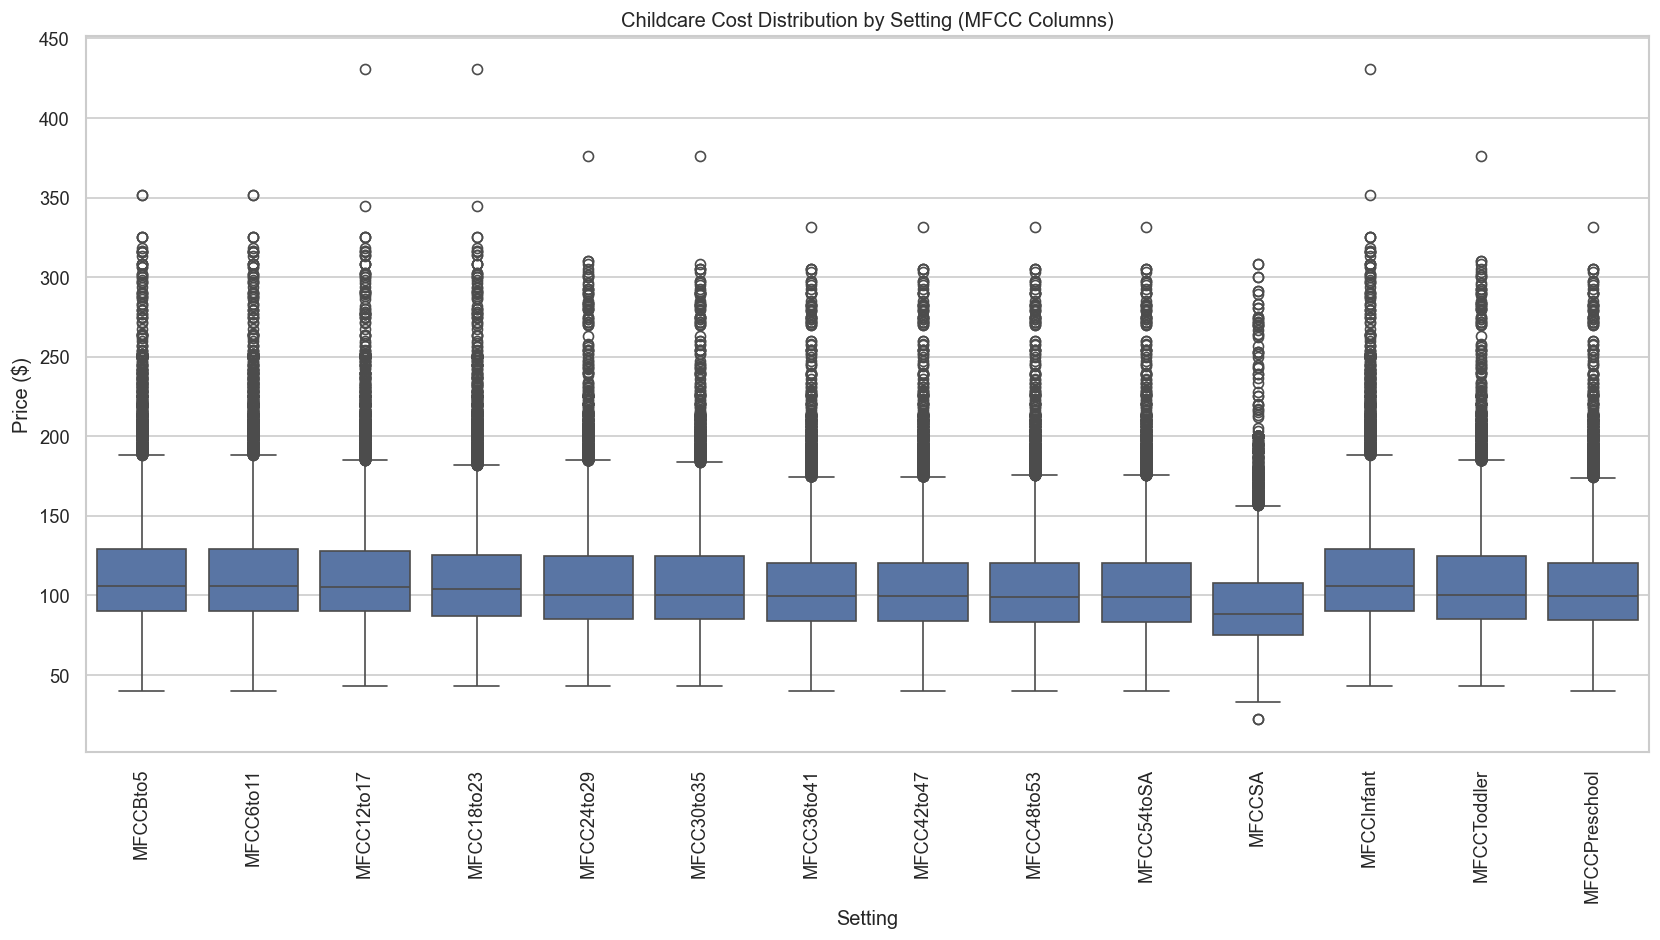

In [145]:
# Reshape MFCC data for plotting
mfcc_long = mfcc_df_cleaned.melt(var_name="Setting", value_name="Price").dropna()

# Boxplot to compare price distributions by setting
plt.figure(figsize=(14, 8))
sns.boxplot(data=mfcc_long, x='Setting', y='Price')
plt.xticks(rotation=90)
plt.title("Childcare Cost Distribution by Setting (MFCC Columns)")
plt.ylabel("Price ($)")
plt.tight_layout()
plt.show()

In [158]:
!jupyter nbconvert --to html --output="DCS640_Pizzoferrato_Milestone1" DCS640_Pizzoferrato_Milestone1.ipynb

[NbConvertApp] Converting notebook DCS640_Pizzoferrato_Milestone1.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 7 image(s).
[NbConvertApp] Writing 1257418 bytes to DCS640_Pizzoferrato_Milestone1.html
